## Space Events with music
Based on the Spotify database

by Carlos Renato Simões

• What were the most popular music in the historical periods: 1961, 1969 and 1990? 

• What is the popularity of the artists mentioned over the years?

• What are the relationships between energy and valence of the mentioned artists?

• What were the most popular artists?

## 1. Business Understanding


Objective: Perform data analysis related to astronomy events.

- The first man in space: 1961
- First man on the Moon: 1969
- Voyager 1's Pale Blue Dot Photo: 1990

Description: This notebook does basic analysis of artists metadata taken from spotify. The data contains numeric generated by spotify which measure the songs, energy, valence and popularity.


## 2. Data Understanding

Import Libraries: First of some preparation. We need to import python libraries containing the necessary functionality we will need.

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Load data: Now that our packages are loaded, let's read in and take a peek at the data.

In [20]:
spotify_data = pd.read_csv('./input/data_o.csv')
spotify_data_1 = spotify_data.drop('id', axis=1)

Statistical summaries and visualisations: To understand the data we are now going to start by looking at a few lines of the data.

In [21]:
spotify_data_1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Variable Description:
- artists: The list of artists of the song.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- duration_ms: The duration of the track in milliseconds.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. (Float)
- explicit: The content item is explicit and the user’s account is set to not play explicit content. Additional reasons may be added in the future. Note: If you use this field, make sure that your application safely handles unknown values.
- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- name: Name of the song.
- popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
- release_date: The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- year: Year information extracted from release_date.
- genres: A list of the genres used to classify the album. For example: “Prog Rock” , “Post-Grunge”. (If not yet classified, the array is empty.)

In [22]:
 spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date'])

### What were the most popular artists?
- Lets show a list of the 5 most popular artists of all time. 

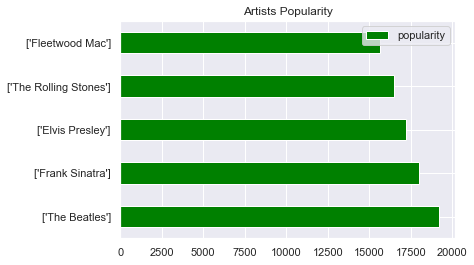

In [24]:
artists_grp = spotify_data.groupby(['artists'])

Top5Artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:5]
Top5Artists.plot.barh(color='green')

plt.title('Artists Popularity')
plt.xlabel('')
plt.ylabel('')

plt.show()

### What were the most popular music in 1961 (The first man in space)?

We start by looking at the relationship between a event and an artist popularity in 1961.

In [25]:
pop_by_year = spotify_data.sort_values('popularity', ascending=False).groupby('year').first()
pop_by_year = pop_by_year.reset_index()
pop_year_full = pop_by_year.reset_index()
pop_by_year = pop_by_year[['year', 'artists', 'name', 'popularity']]

In [26]:
pop_year_full[pop_year_full.year == 1961]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
40,40,1961,0.343,0.941,['Elvis Presley'],0.396,182360,0.293,0,44AyOl4qVkzS48vBsbNXaC,0.000196,2,0.105,-14.062,1,Can't Help Falling in Love,78,1961-10-20,0.0275,100.307


Elvis Presley - Can't Help Falling in Love	

In [27]:
spotify_data['artists'] = spotify_data['artists'].apply(lambda x: x[1:-1].replace("'", ''))

In [34]:
def processArtistPopularity(data, artistName):

    sns.set(style='darkgrid')

    sns.lineplot(x='release_date', y='popularity',lw = 1, data=data, color='Green')

    plt.title("The "+artistName+" Popularity")
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.show()


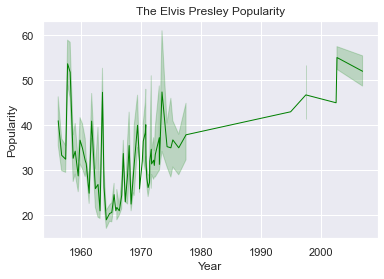

In [36]:
Elvis = spotify_data[spotify_data['artists'] == 'Elvis Presley']

processArtistPopularity(Elvis, "Elvis Presley")

### What were the most popular music in 1969 (First man on the Moon)? 

We start by looking at the relationship between a event and an artist popularity in 1969.

In [23]:
pop_year_full[pop_year_full.year == 1969]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
48,48,1969,0.394,0.0339,['The Beatles'],0.557,185733,0.54,0,6dGnYIeXmHdcikdzNNDMm2,0.00248,9,0.179,-10.484,1,Here Comes The Sun - Remastered 2009,82,1969-09-26,0.0347,129.171


In [ ]:
The Beatles - Here Comes The Sun

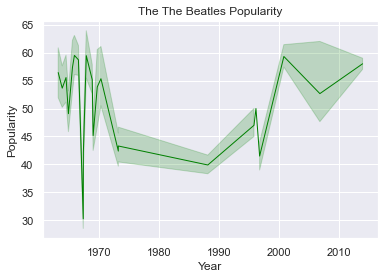

In [37]:
Beatles = spotify_data[spotify_data['artists'] == 'The Beatles']

processArtistPopularity(Beatles, "The Beatles")

### What were the most popular music in 1990 (Pale blue dot photo)? 

We start by looking at the relationship between a event and an artist popularity in 1990.

In [10]:
pop_year_full[pop_year_full.year == 1990]

,index,year,valence,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
69,69,1990,0.259,0.000147,['AC/DC'],0.502,292880,0.89,0,57bgtoPSgt236HzfBOd8kj,0.0117,4,0.217,-5.175,1,Thunderstruck,83,1990-09-24,0.0364,133.52


AC/DC - Thunderstruck

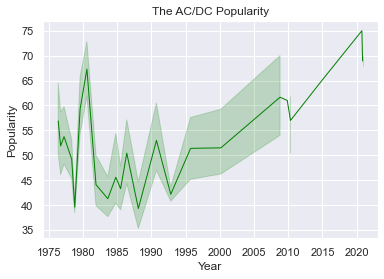

In [38]:
AcDc = spotify_data[spotify_data['artists'] == 'AC/DC']

processArtistPopularity(AcDc, "AC/DC")


## 3. Data Preparation

The variables df_top1, df_top2 and df_top3 are treated as categorical variables. The following analyzes need these variables grouped by artists to perform the data crossing. 

In [47]:
df_top1 = spotify_data[spotify_data['artists'] == "The Beatles"]
df_top2 = spotify_data[spotify_data['artists'] == "AC/DC"]
df_top3 = spotify_data[spotify_data['artists'] == "Elvis Presley"]

### What are the relationships between energy and valence of the mentioned artists?

- Energy Correlation between: The Beatles vs AC/DC vs Elvis Presley

In [48]:
def ComparingArtists(param, df_top1, df_top2, df_top3):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.despine(fig, left=True, bottom=True)
    sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

    sns.distplot(df_top1[param], color='y',label="The Beatles")
    sns.distplot(df_top2[param], color='b',label="AC/DC")
    sns.distplot(df_top3[param], color='m',label="Elvis Presley")

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[1] = 'for all the audio characteristics'

    ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
    plt.rcParams["xtick.labelsize"] = 15

    ax.set_title(param + ' distribution')
    ax.legend(fontsize = 14)


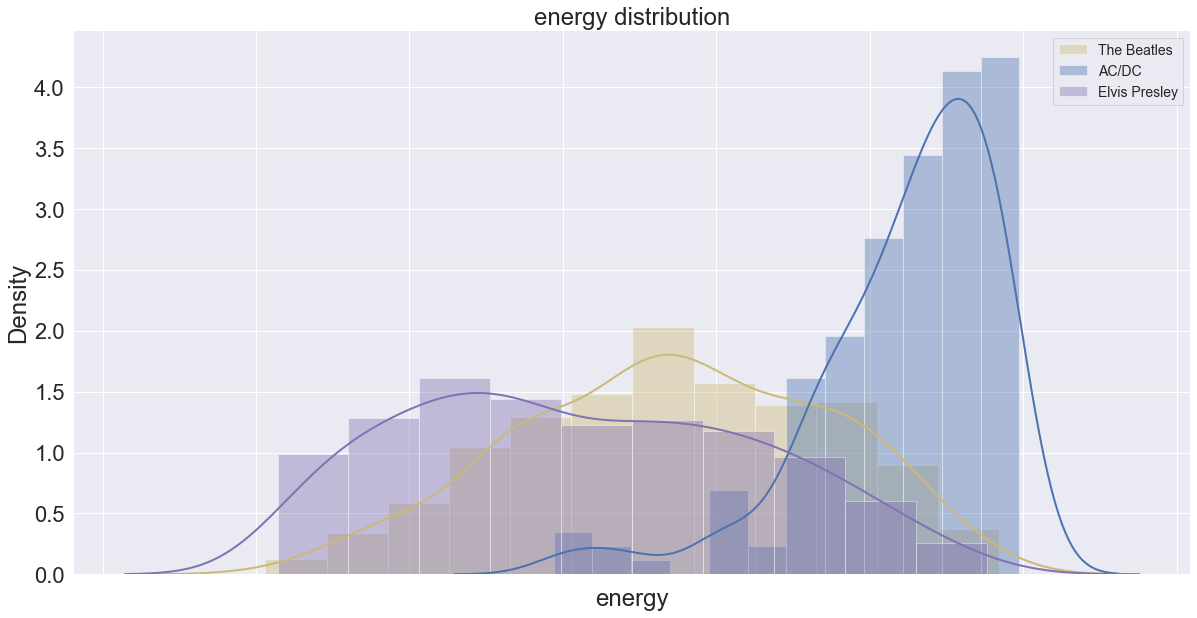

In [49]:
ComparingArtists('energy', df_top1, df_top2, df_top3)

- Valence Correlation between: The Beatles vs AC/DC vs Elvis Presley

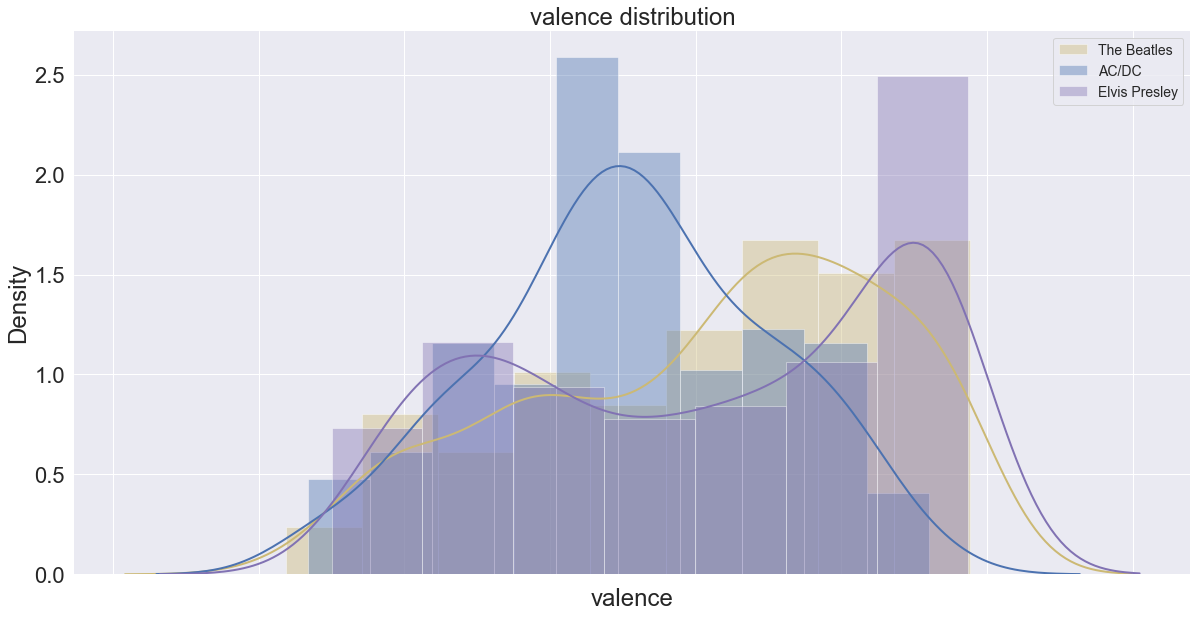

In [50]:
ComparingArtists('valence', df_top1, df_top2, df_top3)

## 4. Evaluation

In [ ]:
Now we are going to evaluate model performance and the feature importance.

- The relationship between legendary rock and roll music was found in the key events surveyed.
- In the valence and energy charts where the three artists were compared, there is evidence of the AC/DC band in the metrics. 
